Napisać program do sprawdzania, czy dana sekwencja liczb naturalnych jest ciągiem graficznym, i do konstruowania grafu prostego o stopniach wierzchołków zadanych przez ciąg graficzny.

In [ ]:
def constructGraphFromGraphical(sequence):
        n = len(sequence)
        adjacency_list = [[] for _ in range(n)]
        active_nodes = list(range(n))  # list of active nodes
        degrees = [0] * n  # list of degrees of nodes
        start_sequence = sequence.copy()
        check_start = 0
        while sequence:
            sequence = sorted(sequence, reverse=True)
            print()
            print("Active nodes:")
            print(active_nodes)
            print("Sequence:")
            print(sequence)
            print("Degrees:")
            print(degrees)
            if sequence[0] == 0:
                break
            while degrees[0] >= start_sequence[check_start]:
                active_nodes.pop(0)
                degrees.pop(0)
                check_start += 1
            for i in range(1, sequence[0] + 1):
                # Find a node that has room for another connection
                for j in range(i, len(active_nodes)):
                    if degrees[j] < start_sequence[j+check_start]:
                        sequence[j] -= 1
                        degrees[j] += 1
                        degrees[0] += 1
                        adjacency_list[active_nodes[0]].append(active_nodes[j])
                        adjacency_list[active_nodes[j]].append(active_nodes[0])
                        break
                else:
                    return None  # Return None if no node has room for another connection
            sequence[0] = 0
            active_nodes.pop(0)  # remove the node from the active list
            degrees.pop(0)  # remove the degree of the processed node
            check_start += 1
        return adjacency_list

In [ ]:
def isGraphicSequence(A):
        n = len(A)
        while True:
            A = sorted(A, reverse=True)
            if all(a == 0 for a in A):
                return True
            if A[0] >= n or any(a < 0 for a in A):
                return False
            for i in range(1, A[0] + 1):
                A[i] -= 1
            A[0] = 0


Active nodes:
[0, 1, 2, 3, 4, 5, 6]
Sequence:
[4, 3, 3, 2, 2, 1, 1]
Degrees:
[0, 0, 0, 0, 0, 0, 0]

Active nodes:
[1, 2, 3, 4, 5, 6]
Sequence:
[2, 2, 1, 1, 1, 1, 0]
Degrees:
[1, 1, 1, 1, 0, 0]

Active nodes:
[2, 3, 4, 5, 6]
Sequence:
[1, 1, 1, 1, 0, 0, 0]
Degrees:
[2, 2, 1, 0, 0]

Active nodes:
[3, 4, 5, 6]
Sequence:
[1, 1, 0, 0, 0, 0, 0]
Degrees:
[2, 2, 0, 0]

Active nodes:
[6]
Sequence:
[0, 0, 0, 0, 0, 0, 0]
Degrees:
[1]


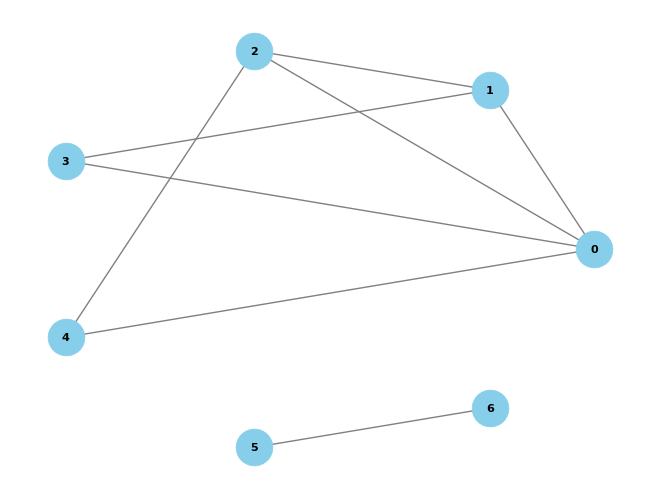

In [1]:
import graph_lib as l1
def main():
    sequence = [4,3,3,2,2,1,1]
    if l1.MyGraph.isGraphicSequence(sequence):
        adjacency_list = l1.MyGraph.constructGraphFromGraphical(sequence)
        if adjacency_list is not None:
            G = l1.MyGraph(adjacency_list, 1)
            G.showGraph()
        else:
            print("The sequence cannot be realized by a simple graph.")
    else:
        print("The sequence is not graphic.")
if __name__ == "__main__":
    main()